In [1]:
import numpy as np
np.random.seed(12345)
data_stream = np.concatenate(
    (np.random.randint(2, size=1000), np.random.randint(8, size=1000))
)


In [9]:
def perform_test(drift_detector, data_stream):
    detected_indices = []
    for i, val in enumerate(data_stream):
        drift_detector.update(val)
        if drift_detector.drift_detected:
            detected_indices.append(i)
    return detected_indices


In [15]:
import matplotlib.pyplot as plt
def show_drift(data_stream, indices):
    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(data_stream)
    ax.plot(
        indices,
        data_stream[indices],
        "ro",
        alpha=0.6,
        markersize=10,
        linewidth=4
    )
    plt.tight_layout()


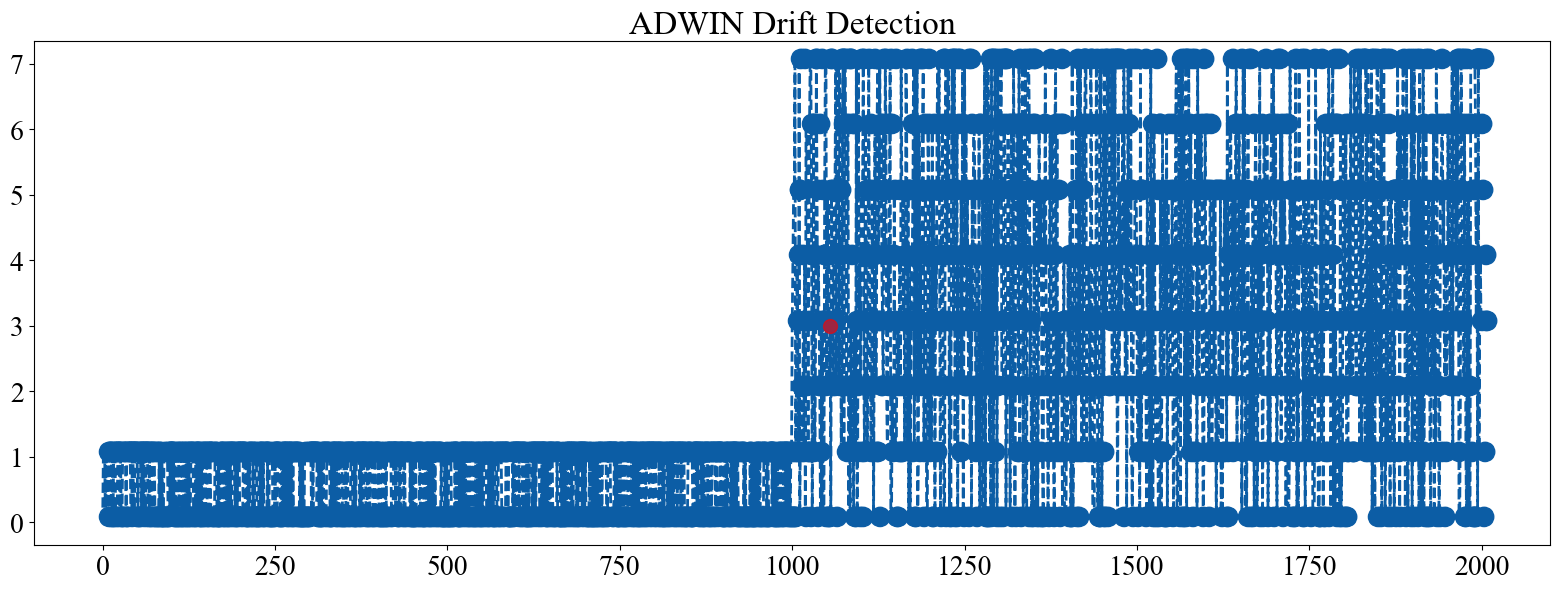

In [19]:
from river.drift import ADWIN
detected_indices = perform_test(ADWIN(), data_stream)
show_drift(data_stream, detected_indices)
plt.title("ADWIN Drift Detection");